# Introducción a Probabilidad

*La probabilidad de un evento es un número entre 0 y 1, donde en términos generales, el 0 indica la imposibilidad del evento, mientras que el 1 indica la certeza. Mientras más alta sea la probabilidad de un evento, es más probable que suceda. Un simple ejemplo es el lanzamiento de una moneda justa (imparcial). Ya que la moneda es "justa", ambos resultados (cara o cruz) son igualmente probables; la probabilidad de se salga "cara", es la misma de que salga "cruz", y ya no es posible que salga otro resultado, la probabilidad de que salga "cara" o "sello" es 1/2 (que también se escribe como 0.5 o 50%)* --- [Fuente](https://en.wikipedia.org/wiki/Probability#:~:text=Probability%20is%20the%20branch%20of,event%20and%201%20indicates%20certainty.)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Ejemplo: Lanzar Monedas

Considera el ejemplo de lanzar una moneda justa para afianzar nuestro vocabulario y símbolos. Vamos a decir que la probabilidad de obtener cara es el total de formas en que este evento suceda dividido entre el número de todos los resultados posibles

**EJEMPLO I**: Una moneda justa

Con una moneda justa, tenemos resultados de cara o cruz. El resultado de interés es de cara o cruz. Nosotros diríamos que la probabilidad de cada uno es $\frac{1}{2}$:

$$P(\text{cara}) = \frac{1}{2} \quad P(\text{sello}) = \frac{1}{2}$$

Ten en cuenta que estas probabilidades suman 1.

**EJEMPLO II**: Una moneda injusta

Un ejemplo de una moneda injusta sería cualquier cosa que no tenga la misma probabilidad. Por ejemplo:

$$P(\text{cara}) = \frac{6}{10} \quad P(\text{sello}) = \frac{4}{10}$$

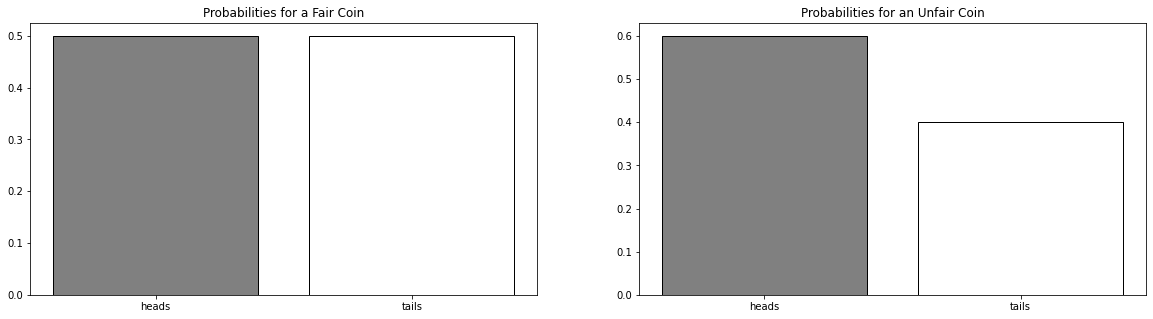

In [ ]:
import scipy.stats as stats
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
fair_coin = stats.bernoulli(.5).pmf([0, 1])
ax[0].bar(['heads', 'tails'], fair_coin, color=['gray', 'white'], edgecolor = 'black')
ax[0].set_title('Probabilities for a Fair Coin');

unfair_coin = stats.bernoulli(.4).pmf([0, 1])
ax[1].bar(['heads', 'tails'], unfair_coin, color = ['gray', 'white'], edgecolor = 'black')
ax[1].set_title('Probabilities for an Unfair Coin');

### Función de Probablidades de Masa

Podemos describir este tipo de evento como una función. Específicamente, una situación en la cual hay dos posibles resultados con una probabilidad asociada a cada uno. Esto se llama una distribución de *bernoulli*, y la forma funcional es:

$$f(k;p)=pk+(1-p)(1-k)\quad {\text{for }}k\in \{0,1\}$$

En nuestro ejemplo de una moneda injusta, si consideramos cara como 0 y sello como 1 ($k$), tendríamos:

$$f(0, .4) = .4*0 + (1 - .4)(1 - 0)$$



que es igual a 0.6.  De forma similar, la probabilidad de sello ($k = 0$):

$$f(1, .4) = .4 * 1 + (1 - 1)(1 - 1)$$

que es igual a 0.4.

In [ ]:
def bernoulli(k, p):
    return p*k + (1-p)*(1 - k)

In [ ]:
bernoulli(0, 0.4)

0.6

In [ ]:
bernoulli(1, 0.4)

0.4

### PROBLEMAS

1. Supongamos que una bolsa contiene 8 metras rojas y 3 metras azules.
 - Cual es la probabilidad de escoger una metra roja de un sorteo aleatori0?
 - Una metra azul?
2. Supongamos que una bolsa contiene 4 metras rojas, 7 metras amarillas y 2 metras azules.
 - Cual es la probabilidad de seleccionar una metra roja *o* una metra amarilla?
 - Cual es la probabilidad de seleccionar una metra amarilla *o* una metra azul ?
 - De cuantas maneras puedes seleccionar 2 colores de metras de la bolsa?
3. Supongamos que una bolsa contiene 10 metras rojas y 7 azules.
 - Supongamos que seleccionas una metra de la bolsa, cual es la probabilidad de que sea roja?
 - Supongamos que seleccionas una metra azul, vuelves a colocarla en la bolsa y seleccionas otra metra. Cual es la probabilidad que la segunda metra sea azul?
 - Supongamos que seleccionas una metra azul, no devuelves la metra a la bolsa y seleccionas otra metra. Cual es la probabilidad que la segunda metra sea azul?

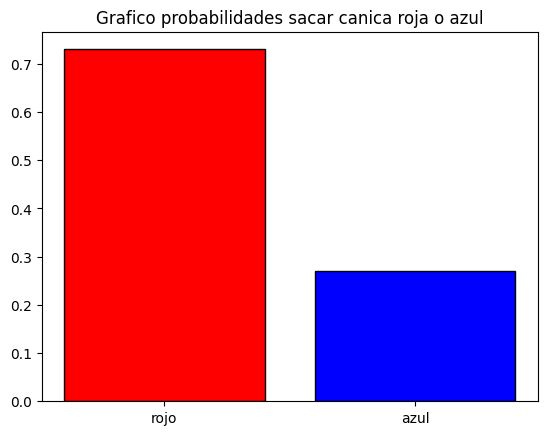

La probabilidad de sacar una canica roja es del: 73.0%
La probabilidad de sacar una canica azul es del: 27.0%


In [15]:
# Ejercicio 1

import scipy.stats as stats
import matplotlib.pyplot as plt

# 11 canicas - 8 rojas y 3 azules

# p_roja = 0.73
# p_azul = 0.27

prob = stats.bernoulli(.27).pmf([0, 1])

plt.bar(['rojo', 'azul'], prob, color=['red', 'blue'], edgecolor='black')
plt.title("Grafico probabilidades sacar canica roja o azul")
plt.show()

print(f"La probabilidad de sacar una canica roja es del: {np.round(prob[0] * 100, 2)}%")
print(f"La probabilidad de sacar una canica azul es del: {np.round(prob[1] * 100, 2)}%")

In [13]:
# Ejercicio 2

import numpy as np

# 13 canicas - 4 rojas, 7 amarillas y 2 azules

# 2.1 - P. coger una canica roja o una canica amarilla

p_roja = 0.31
p_azul = 0.15
p_amarilla = 0.54

p_roja_U_amarilla = 0.46

print(f"La probabilidad de que la canica sea roja o amarilla es del: {np.round(p_roja_U_amarilla * 100, 2)}%")

# 2.2 - P. coger una canica amarilla o azul

# amarilla U azul = 0.54 + 0.15 = 0.69

def bernoulli(k, p):
  return p*k + (1-p)*(1-k)

p_amarilla_U_azul = bernoulli(0, 0.31) # P.de no sacar roja / (P.de sacar roja: (bernoulli(1, 0.31)))

print(f"La probabilidad de que la canica sea amarilla o azul es del: {np.round(p_amarilla_U_azul * 100, 2)}%")

# 2.3 - De cuantas maneras se pueden seleccionar 2 colores de canicas de la bolsa?

# RR - RA - RAZ
# AA - AR - AAZ
# AZAZ - AZR - AZA

# 9 POSIBILIDADES - 3 POSIBILIDADES MISMO COLOR : PROBABILIDAD = 3/9 = 0.33
# 9 POSIBILIDADES - 6 POSIBILIDADES COLORES DISTINTOS: PROBABILIDAD = 6/9 = 0.67

p_canicas_colores_distintos = bernoulli(0, 0.33)

print(f"La probabilidad de que las canicas sean de colores distintos es del: {np.round(p_canicas_colores_distintos * 100, 2)}%")




La probabilidad de que la canica sea roja o amarilla es del: 46.0%
La probabilidad de que la canica sea amarilla o azul es del: 69.0%
La probabilidad de que las canicas sean de colores distintos es del: 67.0%


In [19]:
# Ejercicio 3

# 17 canicas - 10 rojas y 7 azules

# P. de que sea roja

p_roja = bernoulli(1, 0.59)

print(f"La probabilidad de sacar una canica roja es del: {np.round(p_roja * 100, 2)}%")


# Sacas canica azul, la vuelves a meter, y coges otra canica, p. de que la segunda sea azul?

p_azul = bernoulli(0, 0.59)

print(f"La probabilidad de sacar una canica azul 7 es del: {np.round(p_azul * 100, 2)}%, ambas veces, ya que el nº y porcentaje de canicas en la bolsa no varía, son sucesos independientes")

# Sacas canica azul, no la devuelves a la bolsa y sacas otra canica, p.de que la segunda sea azul?

# 16 canicas - 9 azules y 7 rojas

p_azul2 = bernoulli(1, 0.56)

print(f"La probabilidad de sacar una canica azul tras retirar una canica azul de la bolsa es del: {np.round(p_azul2 * 100, 2)}%")

La probabilidad de sacar una canica roja es del: 59.0%
La probabilidad de sacar una canica azul 7 es del: 41.0%, ambas veces, ya que el nº y porcentaje de canicas en la bolsa no varía, son sucesos independientes
La probabilidad de sacar una canica azul tras retirar una canica azul de la bolsa es del: 56.0%
